In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil
import seaborn as sns

In [2]:
crimedata=pd.read_csv("crime_data.csv")

In [3]:
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crimedata.duplicated().sum()

0

In [7]:
crimedata.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
crimedata.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
crime_norm=pd.DataFrame(normalize(crimedata),columns=crimedata.columns)

In [10]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [11]:
crime_std = pd.DataFrame(StandardScaler().fit_transform(crimedata),columns=crimedata.columns)

In [13]:
crime_std

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


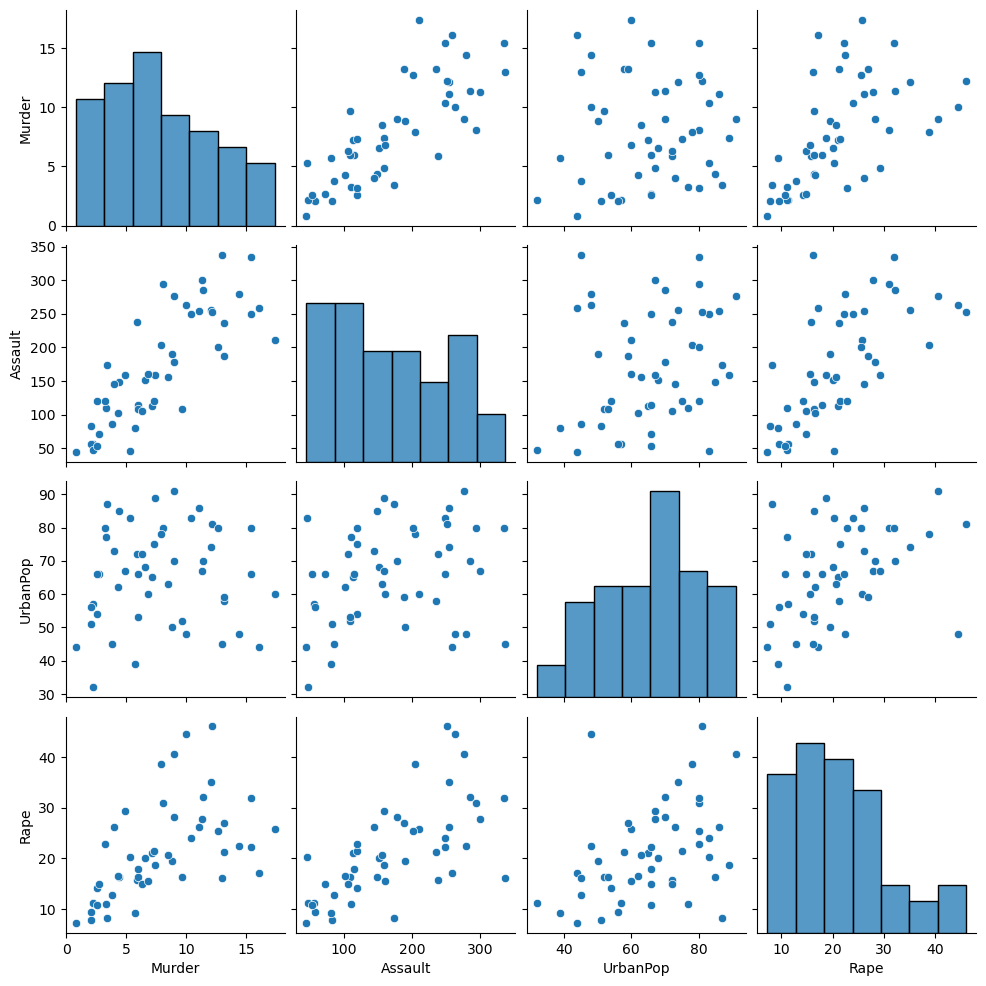

In [18]:
sns.pairplot(crimedata)
plt.show()

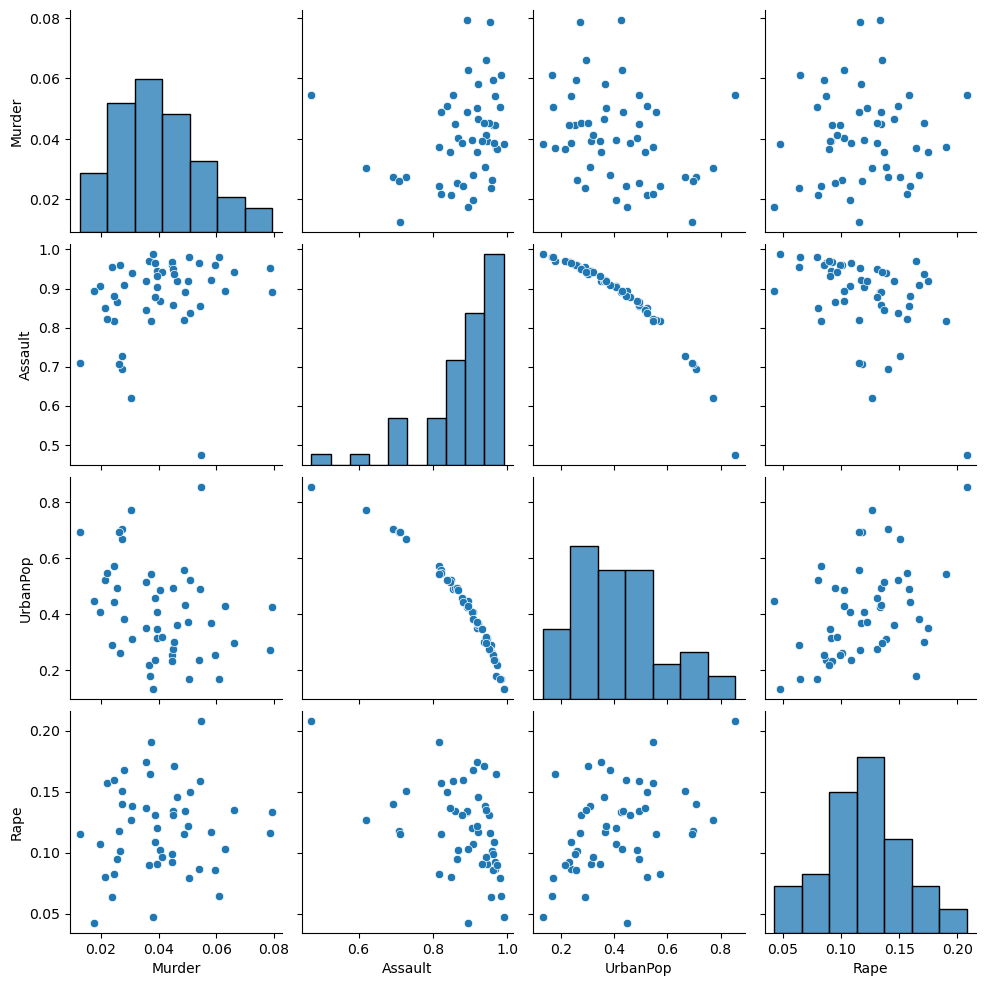

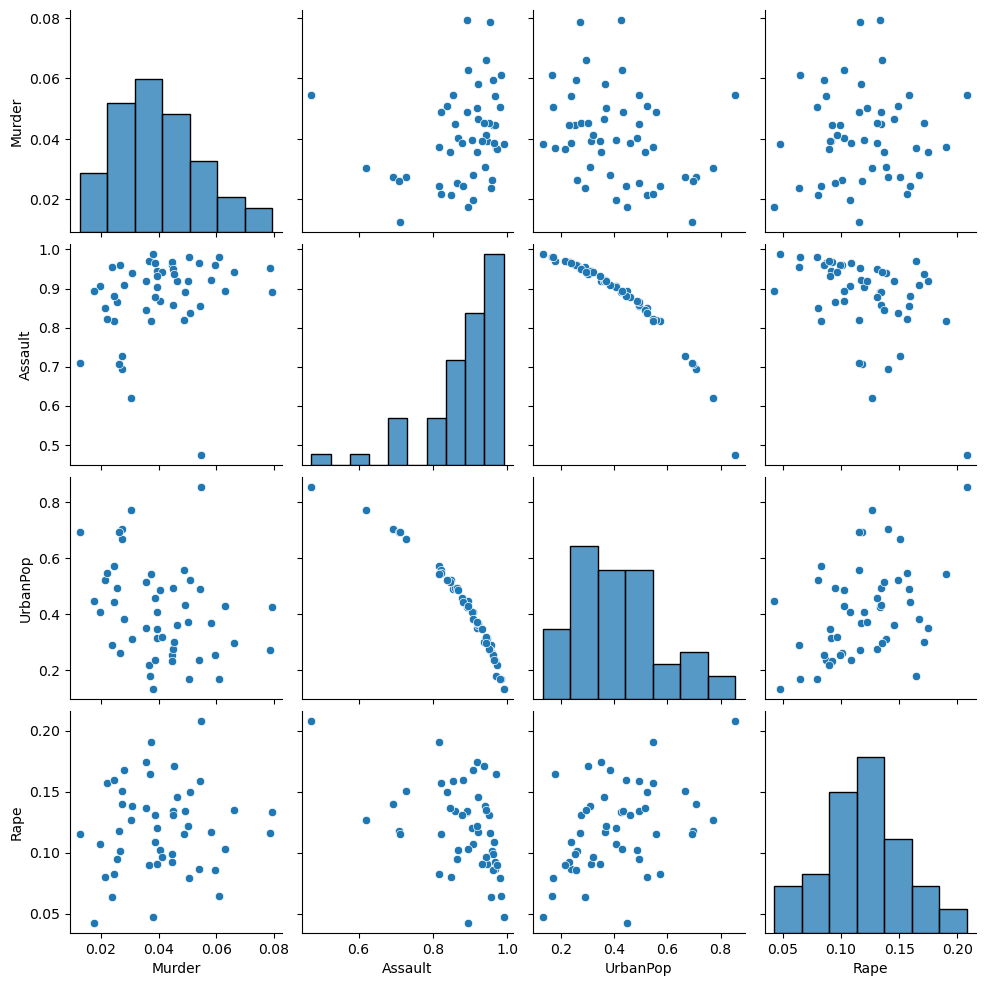

In [17]:
sns.pairplot(crime_norm)
plt.show()

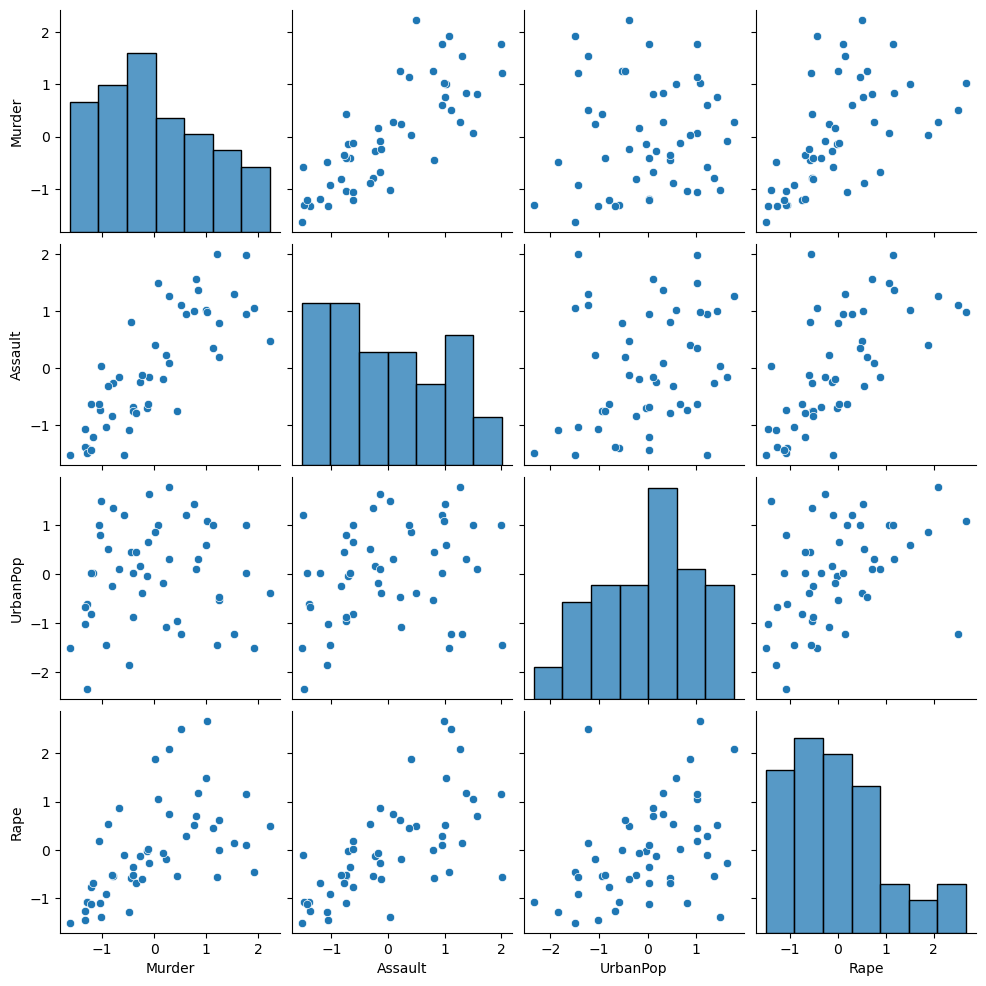

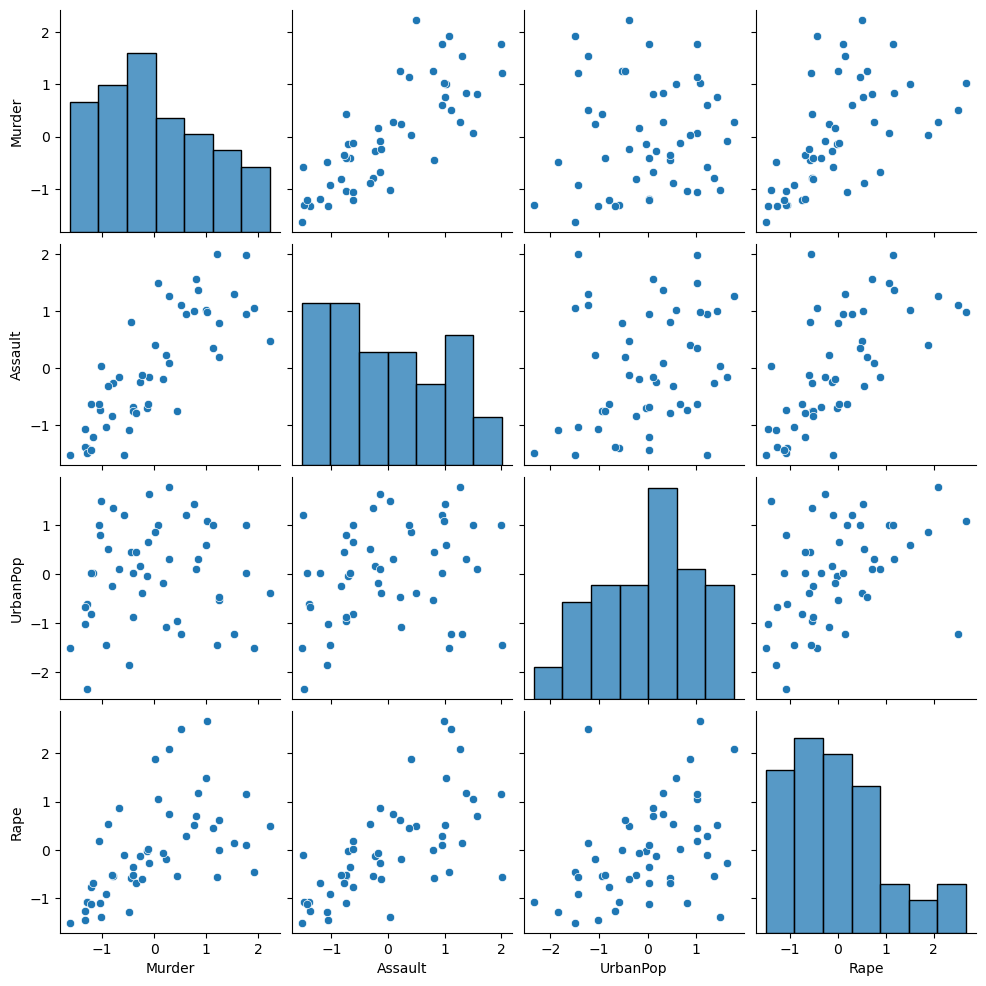

In [21]:
sns.pairplot(crime_std)
plt.show()

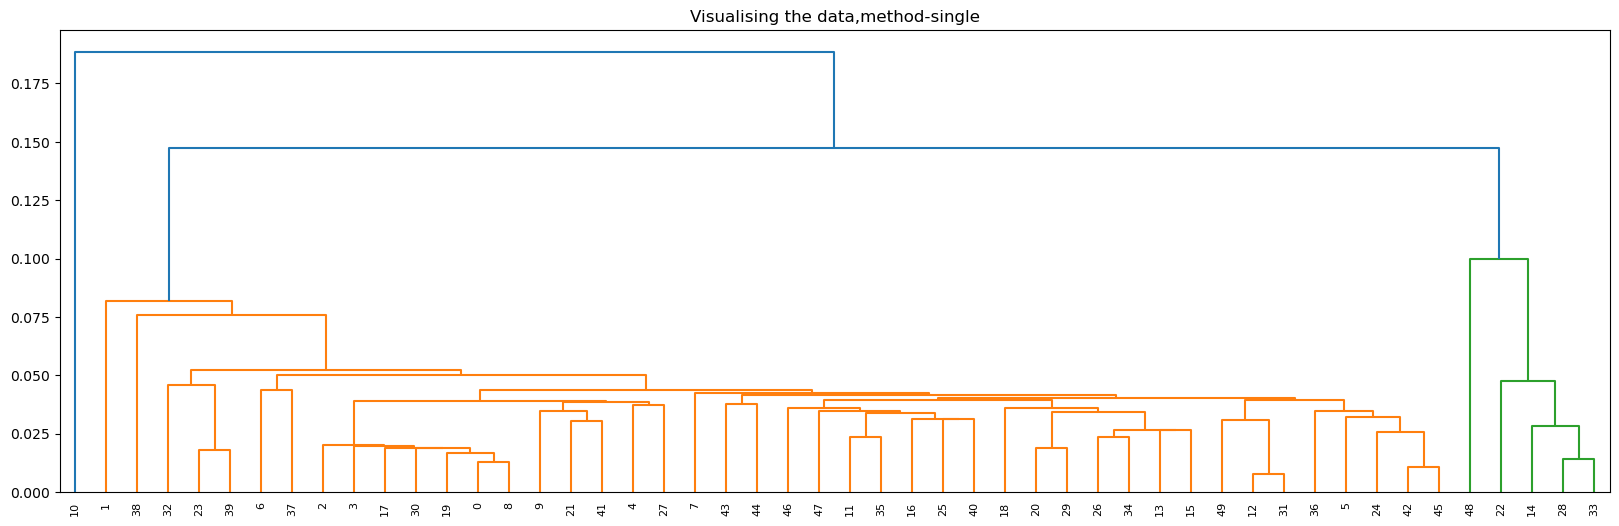

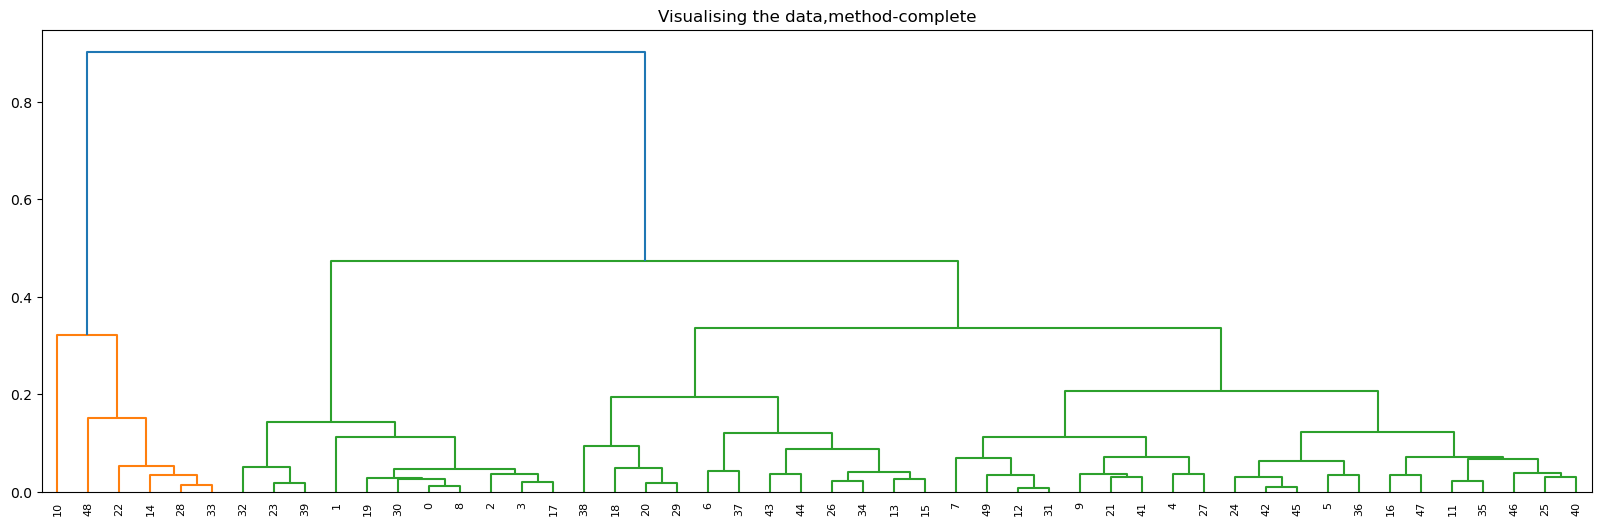

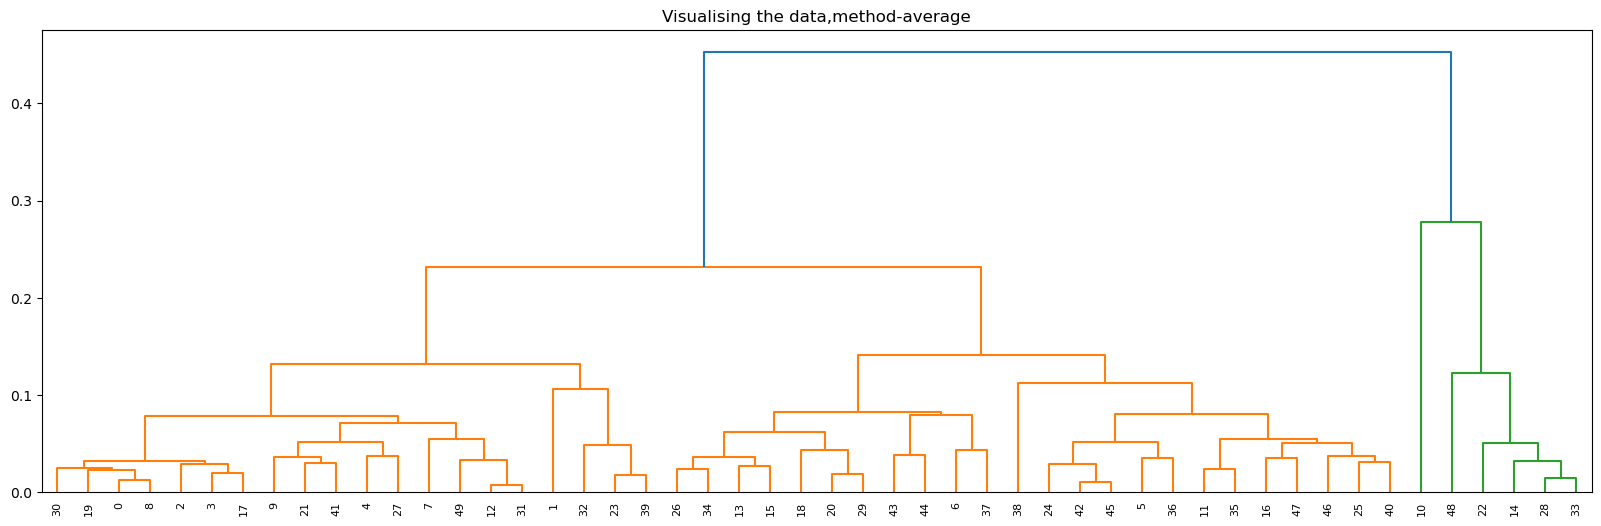

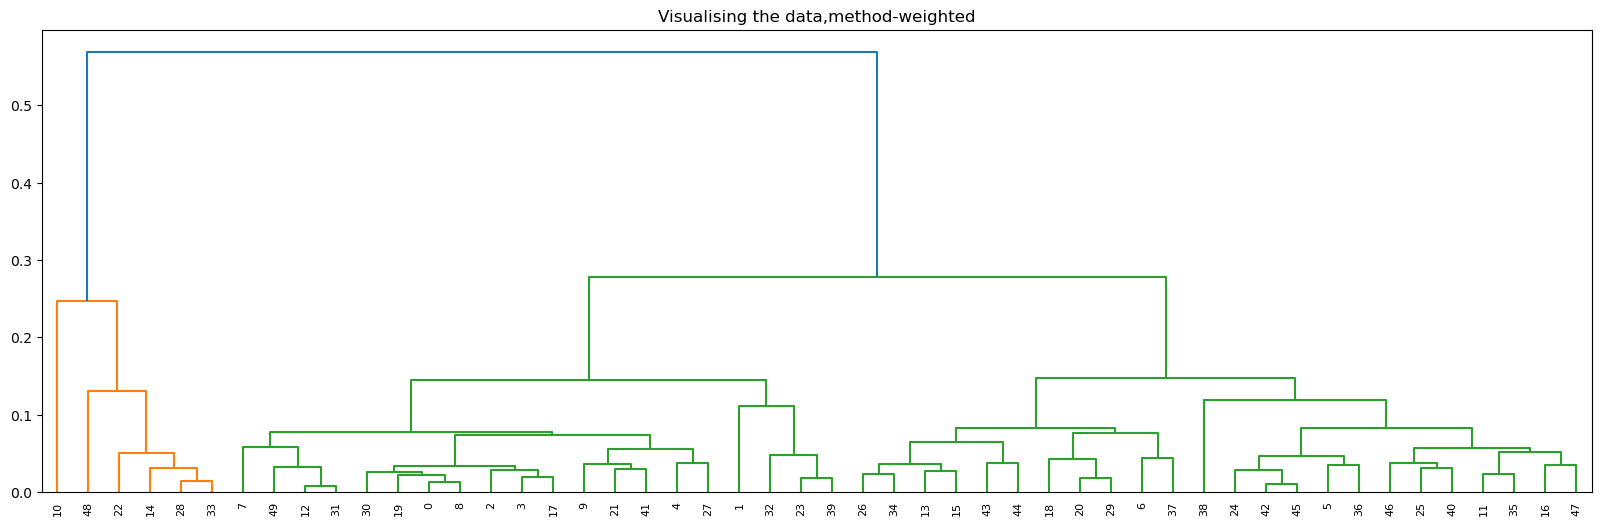

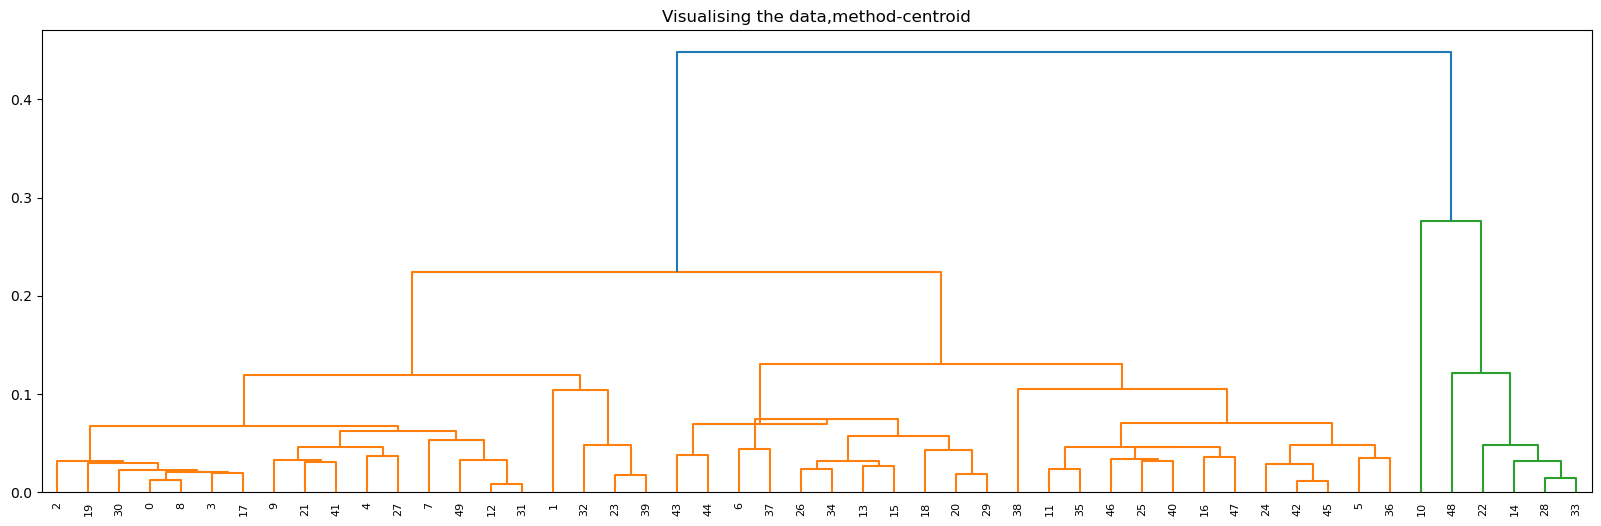

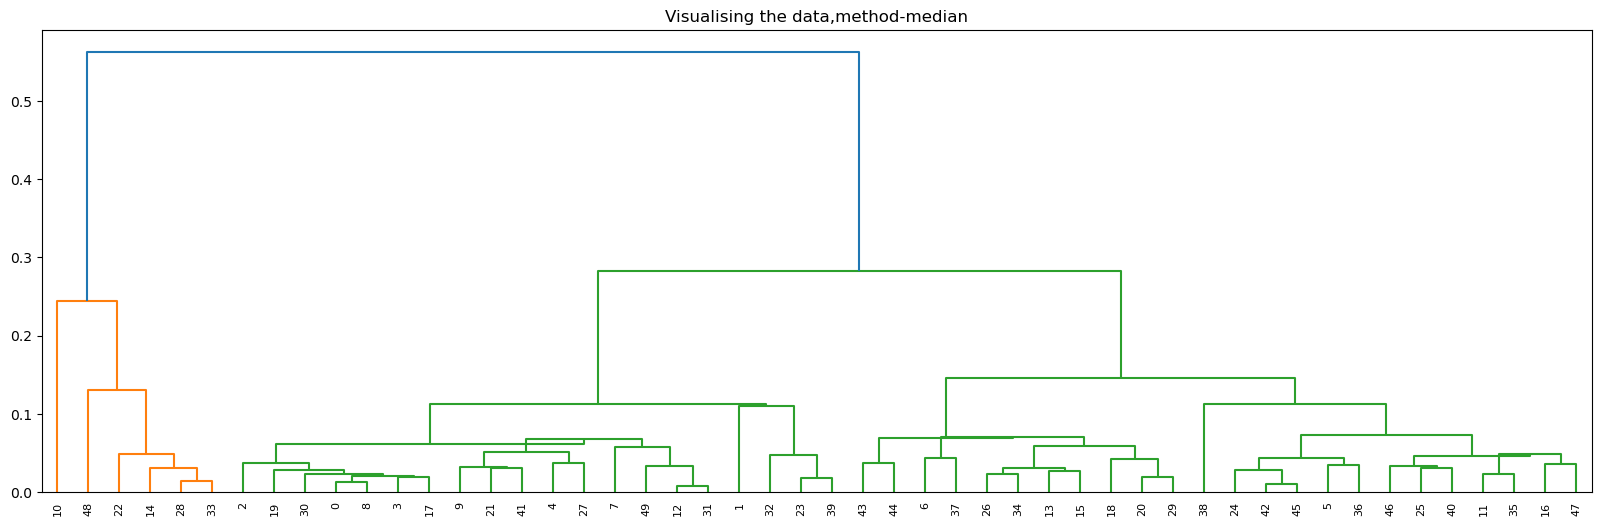

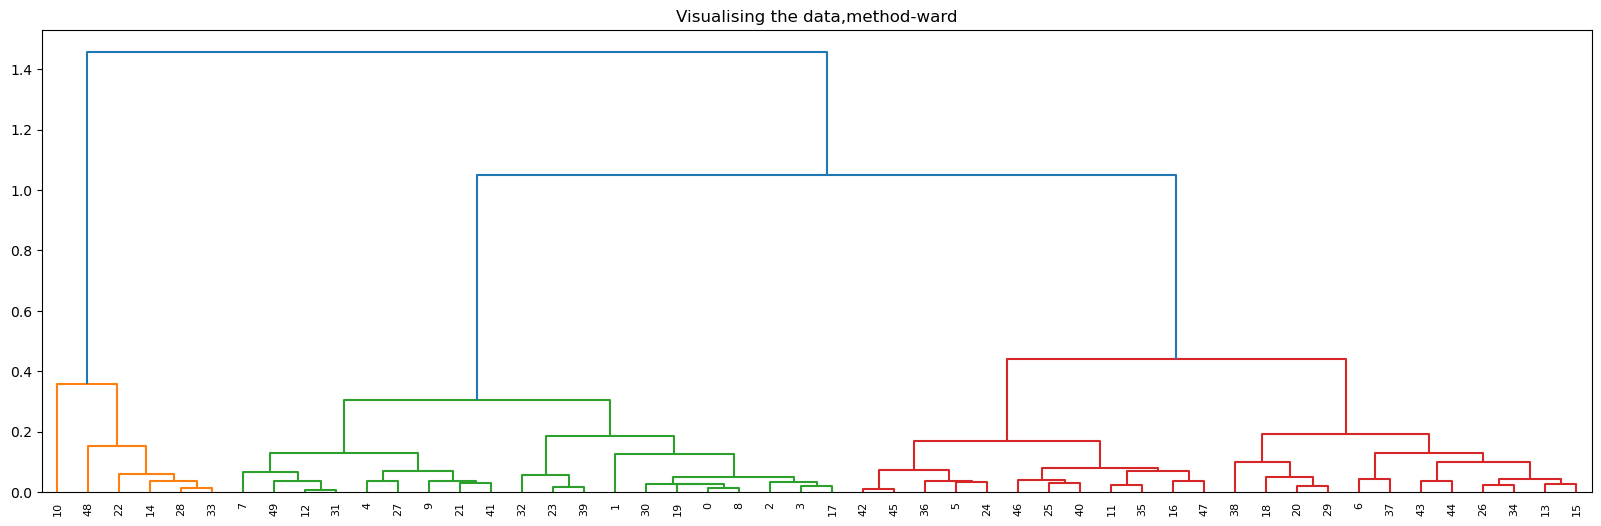

In [26]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(20,6))
    plt.title('Visualising the data,method-{}'.format(methods))
    Dendrogram=sch.dendrogram(sch.linkage(crime_norm,methods,optimal_ordering=False))
    plt.show()


In [33]:
nc = [2,3,4,5,6,7,8,9]
for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(crime_norm)
        sc=sil(crime_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.6037116221173207
Clusters = 2, linkage = single, Sc score = 0.5941710401826306
Clusters = 2, linkage = average, Sc score = 0.6037116221173207
Clusters = 2, linkage = complete, Sc score = 0.6037116221173207

Clusters = 3, linkage = ward, Sc score = 0.5359200720251941
Clusters = 3, linkage = single, Sc score = 0.5431936191625951
Clusters = 3, linkage = average, Sc score = 0.5431936191625951
Clusters = 3, linkage = complete, Sc score = 0.40861432250058

Clusters = 4, linkage = ward, Sc score = 0.44923935480079796
Clusters = 4, linkage = single, Sc score = 0.4966896266306986
Clusters = 4, linkage = average, Sc score = 0.5191395036557488
Clusters = 4, linkage = complete, Sc score = 0.4120453539053902

Clusters = 5, linkage = ward, Sc score = 0.4517242639432266
Clusters = 5, linkage = single, Sc score = 0.09816536549640345
Clusters = 5, linkage = average, Sc score = 0.4635175688797497
Clusters = 5, linkage = complete, Sc score = 0.4115211805628637



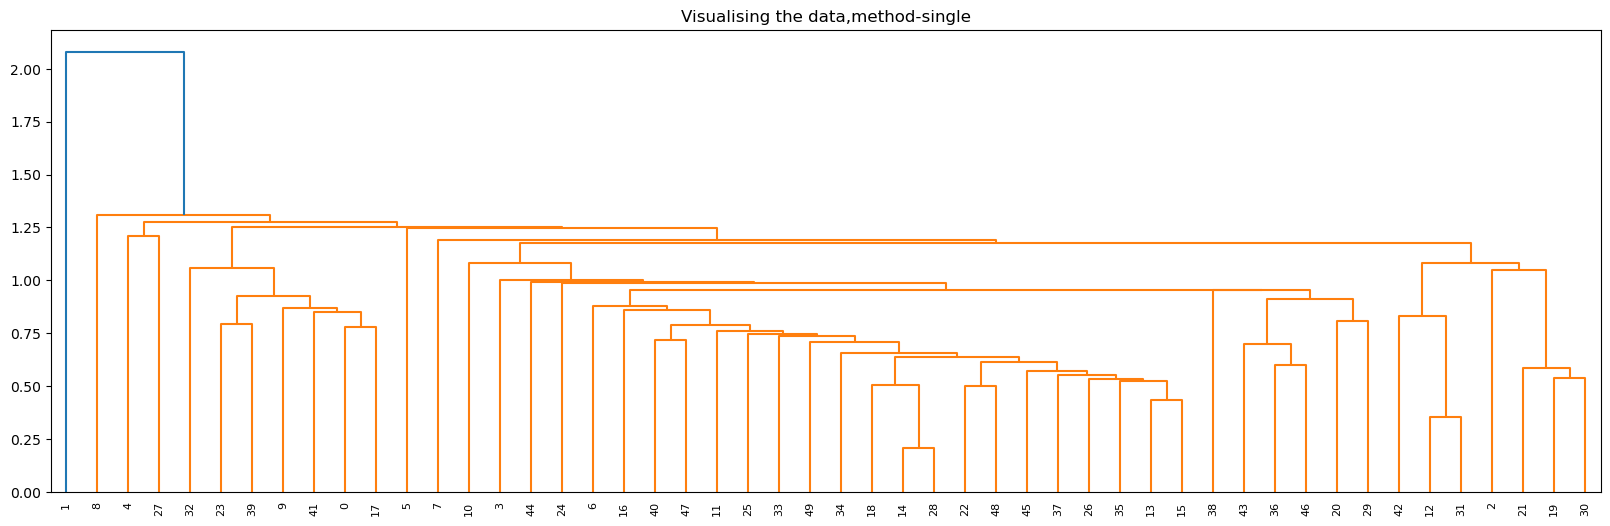

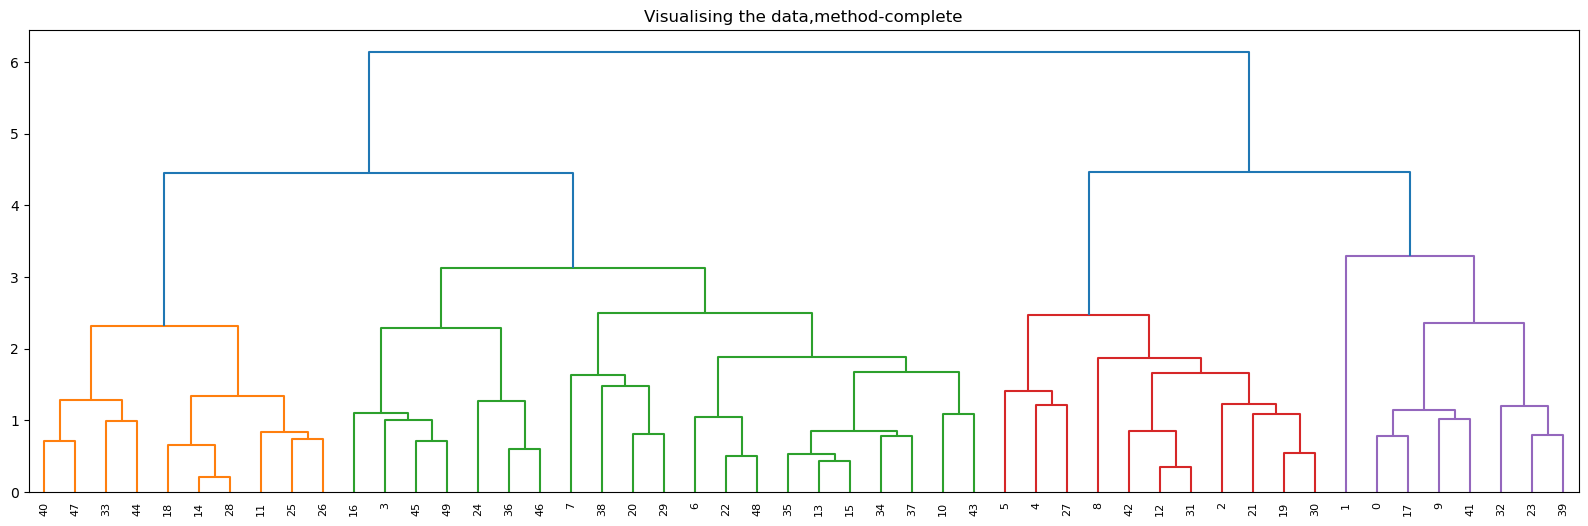

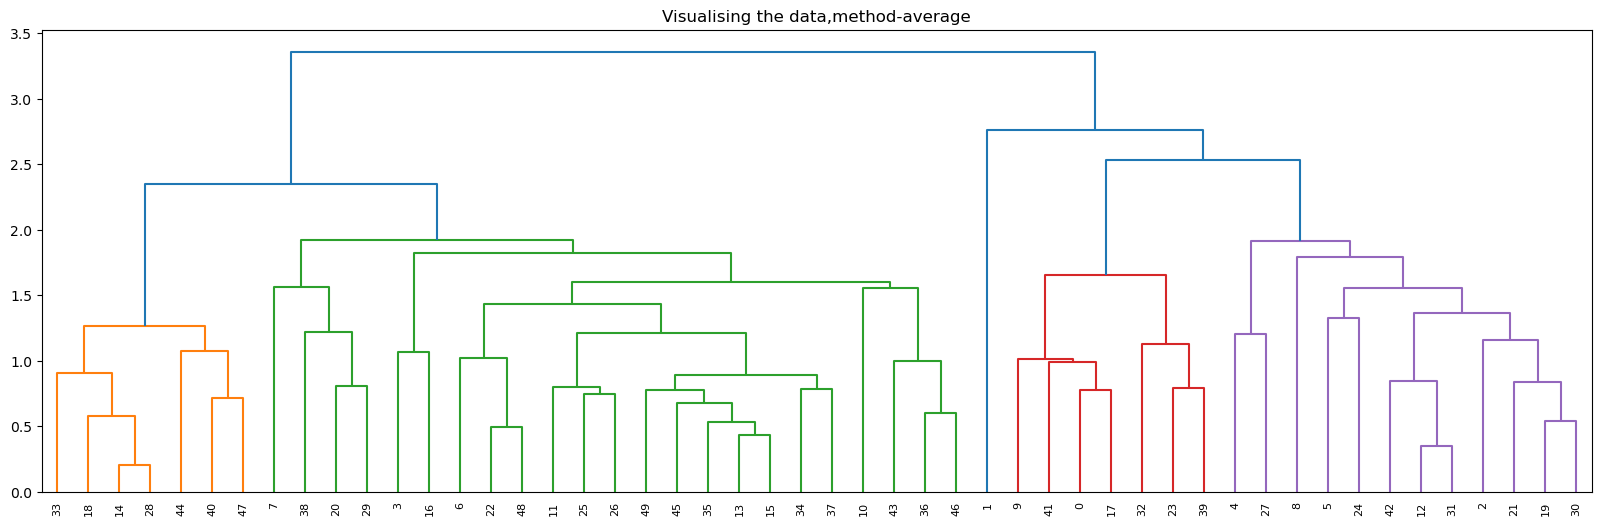

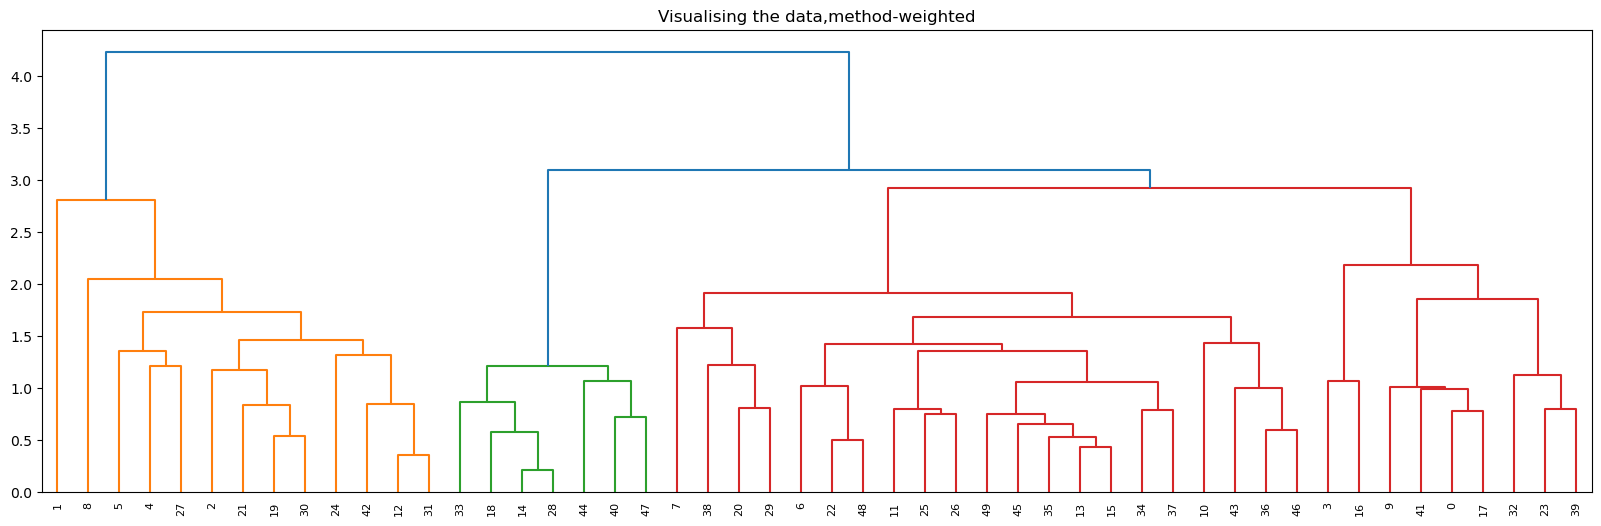

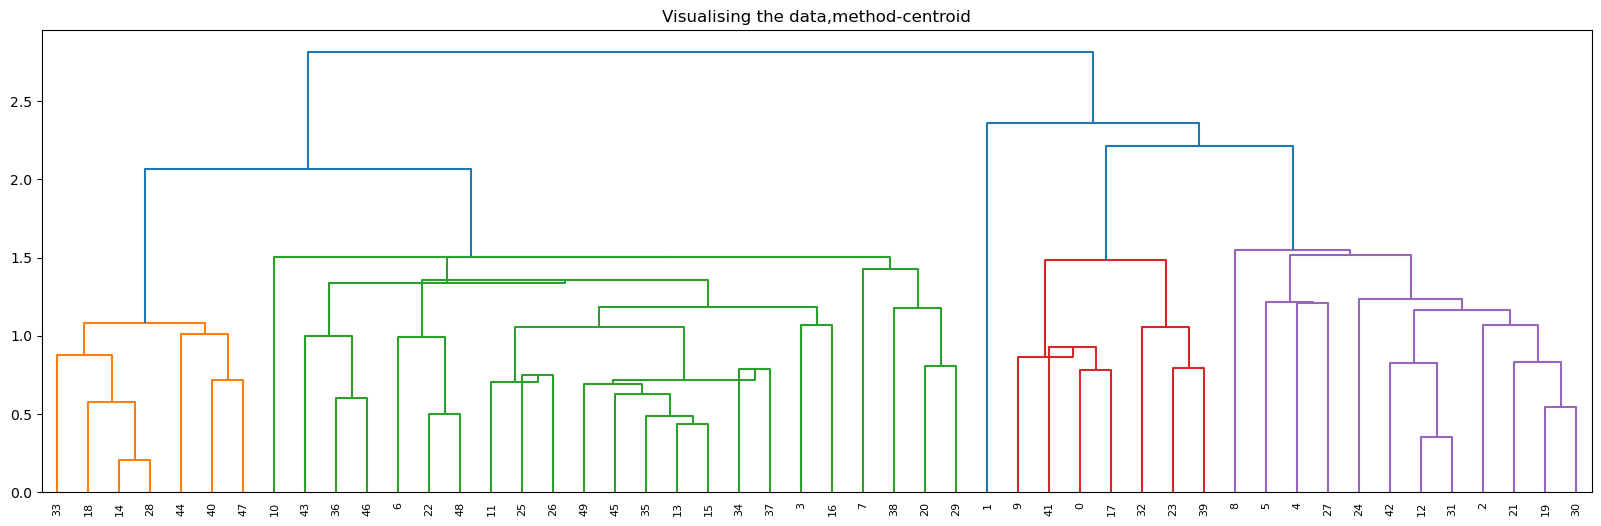

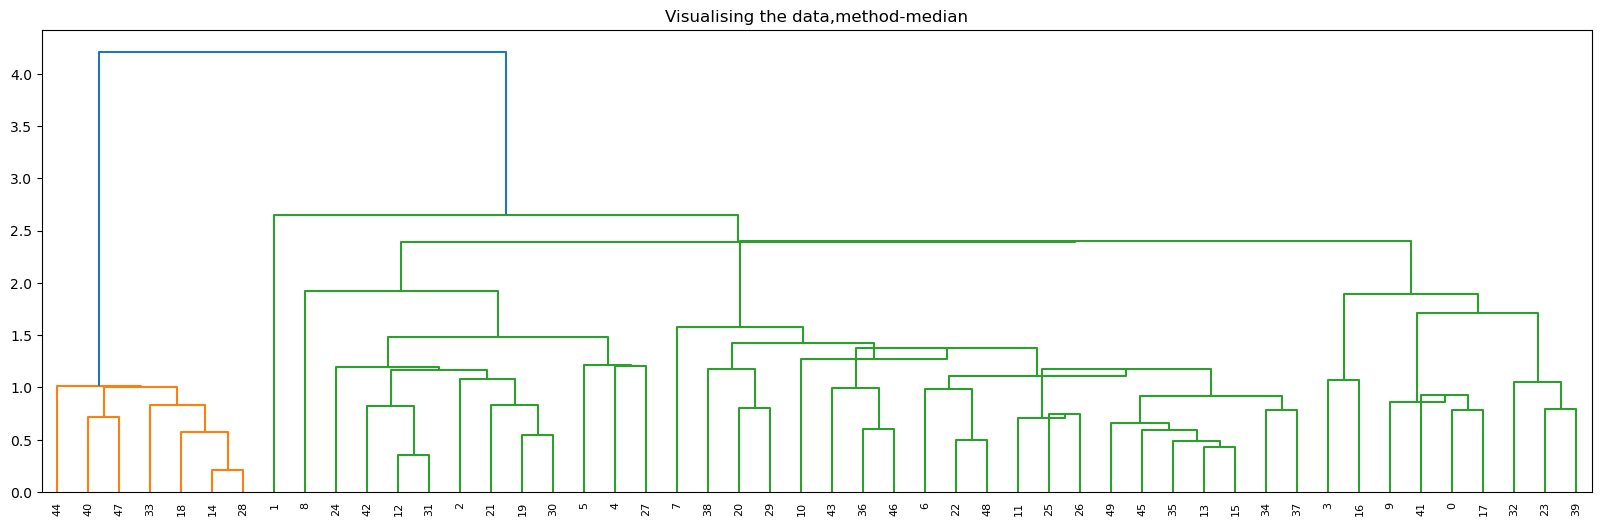

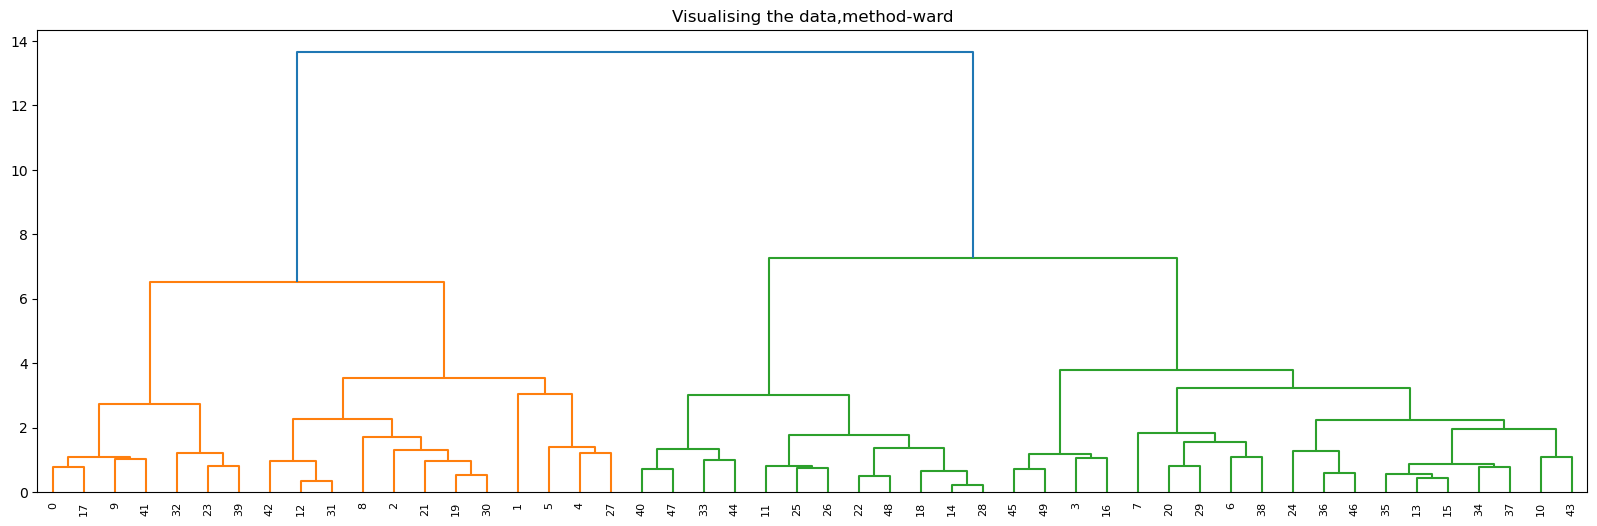

In [32]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(20,6))
    plt.title('Visualising the data,method-{}'.format(methods))
    Dendrogram = sch.dendrogram(sch.linkage(crime_std,method=methods,optimal_ordering=False))
    plt.show()


In [36]:
nc = [2,3,4,5,6,7,8,9]
for i in nc:
    for linkage in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=linkages)
        y = hc.fit_predict(crime_std)
        sc=sil(crime_norm,y)
        print('Clusters={},linkage={},Sc score ={}'.format(i,linkage,sc))
    print(())

Clusters=2,linkage=ward,Sc score =0.37326866995393393
Clusters=2,linkage=single,Sc score =0.37326866995393393
Clusters=2,linkage=average,Sc score =0.37326866995393393
Clusters=2,linkage=complete,Sc score =0.37326866995393393
()
Clusters=3,linkage=ward,Sc score =0.12632185957543615
Clusters=3,linkage=single,Sc score =0.12632185957543615
Clusters=3,linkage=average,Sc score =0.12632185957543615
Clusters=3,linkage=complete,Sc score =0.12632185957543615
()
Clusters=4,linkage=ward,Sc score =-0.04999161183997202
Clusters=4,linkage=single,Sc score =-0.04999161183997202
Clusters=4,linkage=average,Sc score =-0.04999161183997202
Clusters=4,linkage=complete,Sc score =-0.04999161183997202
()
Clusters=5,linkage=ward,Sc score =-0.07048286636192572
Clusters=5,linkage=single,Sc score =-0.07048286636192572
Clusters=5,linkage=average,Sc score =-0.07048286636192572
Clusters=5,linkage=complete,Sc score =-0.07048286636192572
()
Clusters=6,linkage=ward,Sc score =-0.08290056153329842
Clusters=6,linkage=single

In [38]:
model =AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
y=model.fit_predict(crime_norm)
y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 1], dtype=int64)

In [39]:
data1=pd.read_csv('crime_data.csv')

In [40]:
data1['cluster id']=y

In [41]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [42]:
data1.groupby('cluster id').agg(['count']).reset_index()

,cluster id,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,24,24,24,24,24
1,1,20,20,20,20,20
2,2,1,1,1,1,1
3,3,5,5,5,5,5


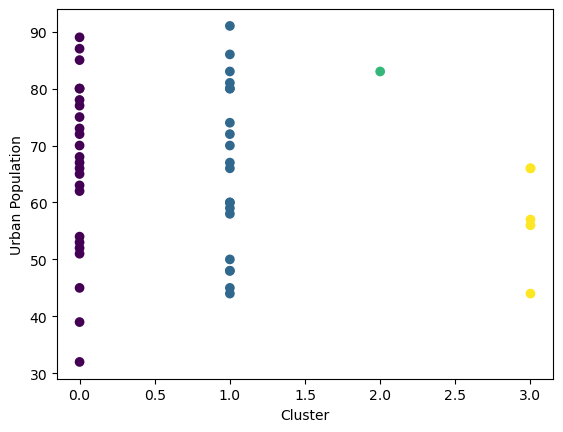

In [43]:
plt.scatter(data1['cluster id'],data1['UrbanPop'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Urban Population')
plt.show()

In [46]:
nc =[2,3,4,5,6,7,8,9]
iner =[]
silscore=[]

for i in nc:
    km=KMeans(i)
    km.fit(crime_norm)
    iner.append(km.inertia_)
    
for i in nc:
    hc=KMeans(n_clusters=i)
    y=hc.fit_predict(crime_norm)
    silscore.append(sil(crime_norm,y))

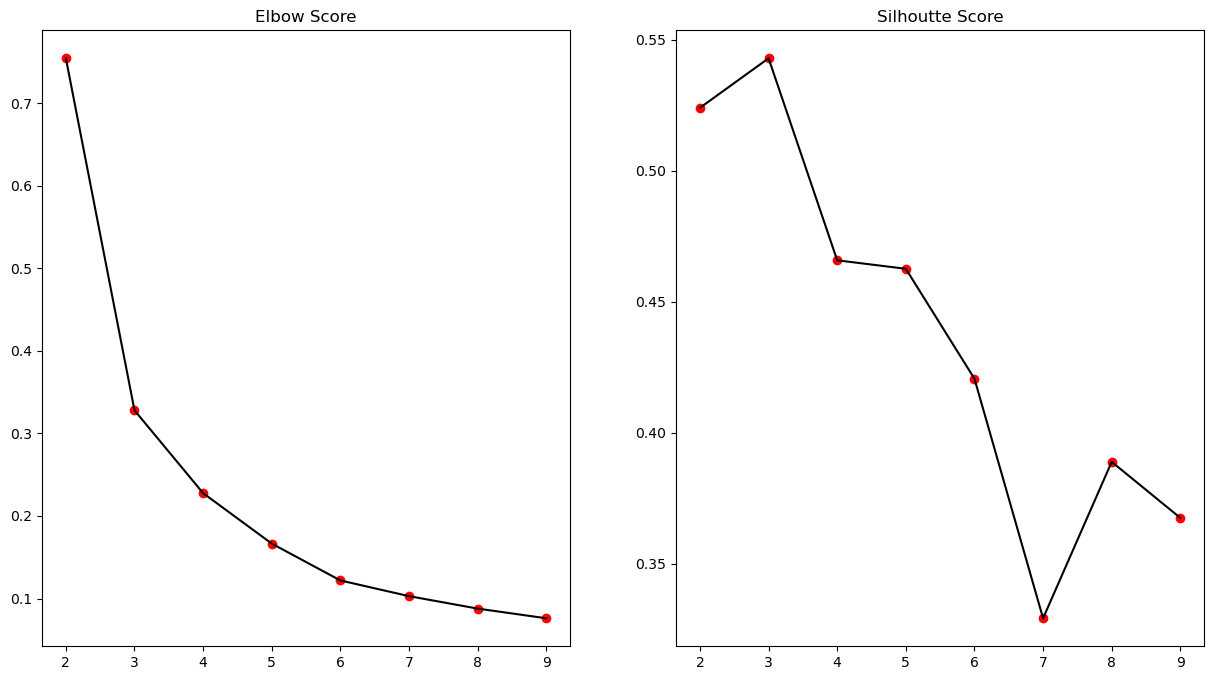

In [50]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')
plt.show()

In [53]:
nc= [2,3,4,5,6,7,8,9]
iner =[]
silscore =[]

for i in nc:
    km=KMeans(i)
    km.fit(crime_std)
    iner.append(km.inertia_)

for i in nc:
    hc=KMeans(n_clusters=i)
    y=hc.fit_predict(crime_std)
    silscore.append(sil(crime_std,y))

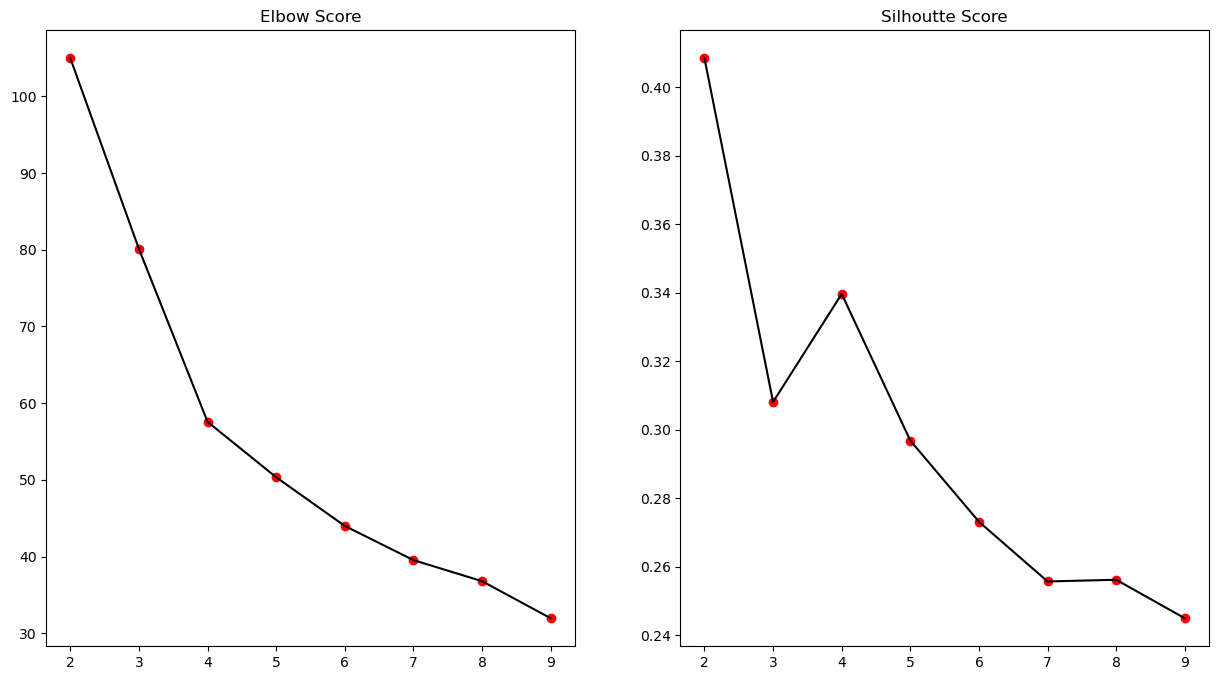

In [54]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')

plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')
plt.show()

In [57]:
km = KMeans(4)
km.fit(crime_norm)
km.labels_

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 2, 3, 2,
       1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 3,
       3, 0, 0, 0, 1, 0])

In [59]:
data2=pd.read_csv("crime_data.csv")
data2['cluster id']=pd.Series(km.labels_)
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster id
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,2


In [60]:
data2.groupby('cluster id').agg(['count']).reset_index()

,cluster id,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,14,14,14,14,14
1,1,6,6,6,6,6
2,2,19,19,19,19,19
3,3,11,11,11,11,11


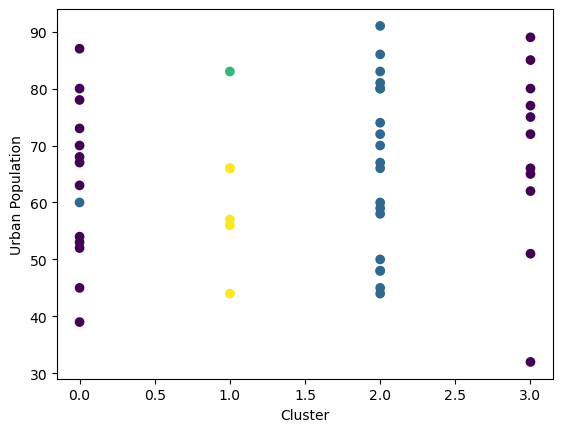

In [61]:
plt.scatter(data2['cluster id'],data1['UrbanPop'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Urban Population')
plt.show()

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()
data=scaler.fit_transform(crimedata)

In [64]:
data

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [65]:
dbs = DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(data)
class_pr

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [69]:
dbs_df1=crimedata.copy()
dbs_df1['clusters']=class_pr
dbs_df1['clusters'].value_counts()

-1    20
 1    18
 3     3
 5     3
 0     2
 2     2
 4     2
Name: clusters, dtype: int64

In [70]:
dbs_df1.groupby(['clusters']).mean()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
-1,8.915000,198.100000,69.950000,24.635000
0,14.300000,242.500000,62.000000,21.700000
1,4.644444,99.222222,59.000000,14.577778
2,10.750000,251.500000,84.500000,25.050000
3,11.600000,280.000000,70.333333,31.666667
4,15.250000,269.000000,46.000000,19.800000
5,4.033333,141.333333,73.333333,26.133333
